# Kmeans Clustering with Images and Other Data

Kmeans with sklearn can be used to cluster with image data and other data types. 
This unsupervised learning algorithm is used to cluster data into groups, which is
useful for image segmentation, customer segmentation, and other applications.

## Kmeans with Image

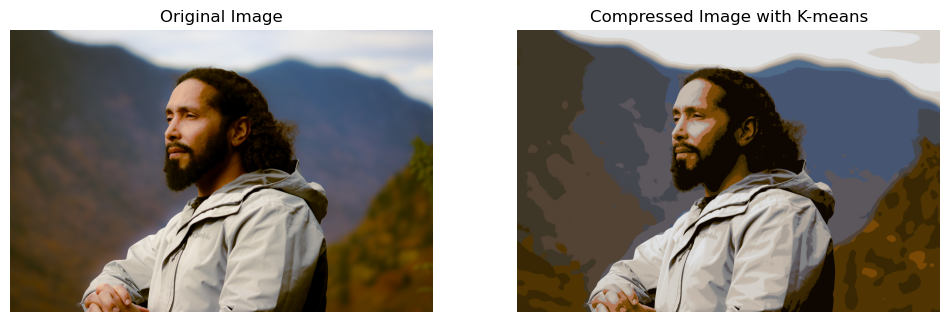

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from PIL import Image

# Load the image
image = Image.open('./data/my_image.jpg')
# image = image.resize((128, 128))  # Resize for faster processing (optional)
image_np = np.array(image)

# Reshape the image to a 2D array of pixels
pixels = image_np.reshape(-1, 3)

# Define the number of colors (clusters)
n_colors = 16

# Perform K-means clustering
kmeans = KMeans(n_clusters=n_colors, random_state=42)
kmeans.fit(pixels)

# Replace each pixel value with its corresponding cluster center
new_colors = kmeans.cluster_centers_[kmeans.predict(pixels)]
compressed_image_np = new_colors.reshape(image_np.shape).astype(np.uint8)

# Convert the numpy array back to an image
compressed_image = Image.fromarray(compressed_image_np)

# Display the original and compressed images
fig, ax = plt.subplots(1, 2, figsize=(12, 12))

ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(compressed_image)
ax[1].set_title('Compressed Image with K-means')
ax[1].axis('off')

plt.show()


### Explanation:

1. Load the Image: 
    - We load an image using the PIL library and optionally resize it to a smaller size for faster processing.
2. Reshape the Image: 
    - Convert the 3D image array (height, width, color channels) into a 2D array where each row represents a pixel and each column represents a color channel (R, G, B).
3. Perform K-means Clustering: 
    - Use the KMeans algorithm from scikit-learn to cluster the pixel colors into n_colors clusters.
4. Replace Pixel Values: 
    - Replace each pixel's color with the nearest cluster centroid color to reduce the number of unique colors in the image.
5. Reshape and Convert: 
    - Convert the 2D array of compressed pixels back into the original 3D image shape and then back to an image format.
6. Display Images: 
    - Use matplotlib to display the original and compressed images side by side for comparison.

> Note: Make sure to replace 'path_to_your_image.jpg' with the actual path to the image file you want to use. This example reduces the number of colors in the image to 16, but you can adjust n_colors to any value you prefer.j

### Why K-means on Image Data?

K-means clustering can be highly useful for image data for several reasons:

1. Image Compression: 
    - Reducing the number of colors in an image to decrease file size while preserving visual quality. This is particularly useful for efficient storage and transmission of images.

2. Image Segmentation: 
    - Dividing an image into meaningful regions based on pixel similarity. This can be used in medical imaging to isolate areas of interest, such as tumors or other abnormalities.

3. Object Detection and Recognition: 
    - Simplifying the color space to enhance the performance of object detection and recognition algorithms by focusing on key features and reducing noise.

4. Color Quantization: 
    - Simplifying an image's color palette, which can be beneficial for digital art, printing, and other applications where a limited number of colors are needed.

5. Texture Analysis: 
    - Grouping pixels with similar textures to identify patterns and structures within an image, which can be useful in fields like remote sensing and material science.

## Kmeans with Iris Data

The Iris dataset is a classic dataset used in machine learning and statistics for classification and clustering tasks. It consists of 150 samples from three different species of iris flowers. Each sample has four features: sepal length, sepal width, petal length, and petal width. The target variable in the dataset represents the species of the iris flower.

### Target Names and Mapping
The target names in the Iris dataset correspond to the three species of iris flowers. The mapping between the target values (labels) and the species names is as follows:

- 0: Iris setosa
- 1: Iris versicolor
- 2: Iris virginica

### Detailed Description

#### Iris setosa (0)

Description: This species is one of the most easily recognizable due to its distinct morphological features.
Characteristics:

- Sepal Length: Typically shorter
- Sepal Width: Relatively wider
- Petal Length: Short
- Petal Width: Narrow

#### Iris versicolor (1)

Description: This species exhibits intermediate characteristics between Iris setosa and Iris virginica.
Characteristics:
- Sepal Length: Medium
- Sepal Width: Medium
- Petal Length: Medium
- Petal Width: Medium

#### Iris virginica (2)

Description: This species tends to have the largest flower dimensions among the three.
Characteristics:
- Sepal Length: Typically longer
- Sepal Width: Narrower
- Petal Length: Long
- Petal Width: Wide

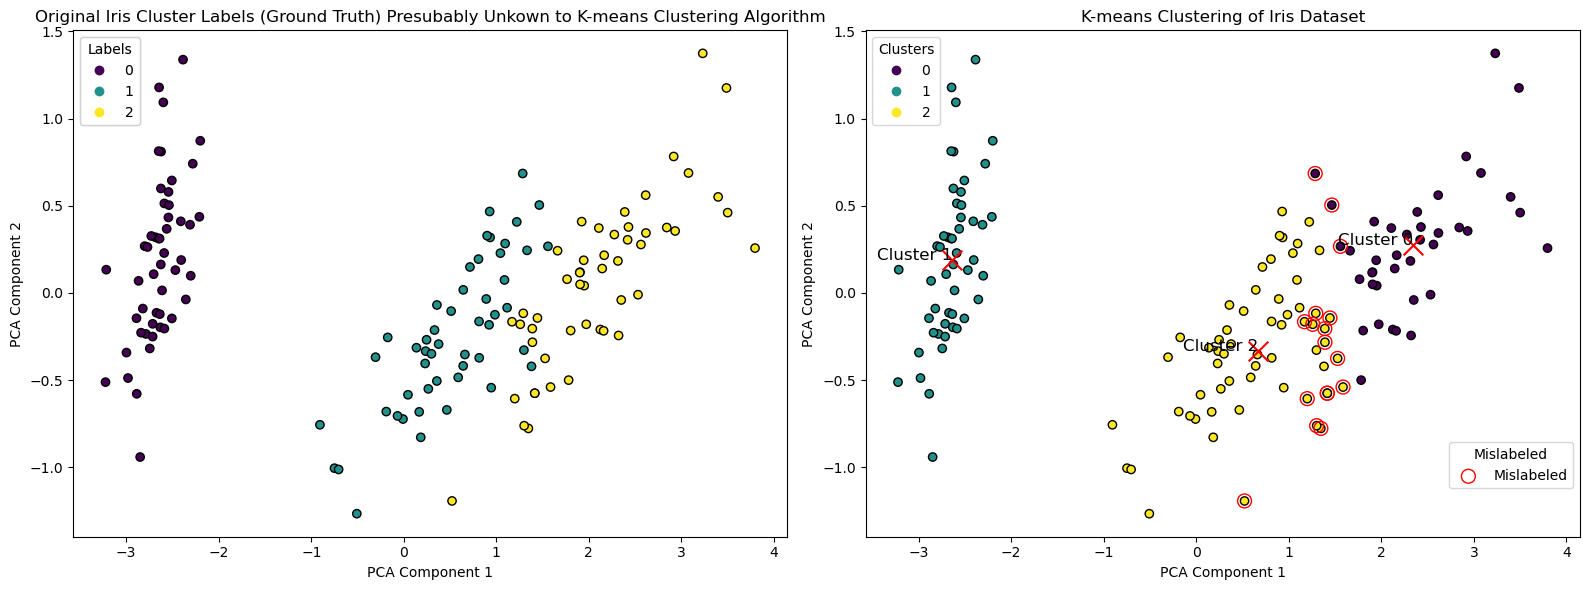

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Perform K-means clustering
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)

# Get the cluster labels
labels = kmeans.labels_

# Visualize the clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

#Setup 2 x 1 grid
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Plot the PCA-reduced data with cluster labels
scatter = ax[0].scatter(X_pca[:, 0], X_pca[:, 1], c=df['label'], cmap='viridis', marker='o', edgecolor='k')
ax[0].set_title('Original Iris Cluster Labels (Ground Truth) Presubably Unkown to K-means Clustering Algorithm')
ax[0].set_xlabel('PCA Component 1')
ax[0].set_ylabel('PCA Component 2')
legend1 = ax[0].legend(*scatter.legend_elements(), title="Labels")
ax[0].add_artist(legend1)

# Plot the PCA-reduced data with cluster labels
scatter = ax[1].scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k')
ax[1].set_title('K-means Clustering of Iris Dataset')
ax[1].set_xlabel('PCA Component 1')
ax[1].set_ylabel('PCA Component 2')
legend1 = ax[1].legend(*scatter.legend_elements(), title="Clusters")
ax[1].add_artist(legend1)

# Print the cluster centers
centroids = kmeans.cluster_centers_

# Create a DataFrame for the cluster centers and reduce to 2D using PCA for plotting
centroids_pca = pca.transform(centroids)
df_centroids = pd.DataFrame(centroids, columns=feature_names)
df_centroids_pca = pd.DataFrame(centroids_pca, columns=['PCA Component 1', 'PCA Component 2'])

# Plot the cluster centers
ax[1].scatter(df_centroids_pca['PCA Component 1'], df_centroids_pca['PCA Component 2'], c='red', marker='x', s=200)
for i, row in df_centroids_pca.iterrows():
    ax[1].text(row['PCA Component 1'], row['PCA Component 2'], f'Cluster {i}', fontsize=12, ha='right')

# Plot misslabeled points
mislabeled = labels != list(map({0: 1, 1: 2, 2: 0}.get, y))
ax[1].scatter(X_pca[mislabeled, 0], X_pca[mislabeled, 1], facecolors='none', edgecolors='r', s=100, label='Mislabeled')

# Add misslabel legend
legend2 = ax[1].legend(title="Mislabeled", loc='upper right', bbox_to_anchor=(1.0, .2))

plt.tight_layout()
plt.show()


### Explanation:
1. Load the Iris Dataset:
    - We load the Iris dataset from sklearn.datasets. This dataset includes 150 samples of iris flowers, each with four features: sepal length, sepal width, petal length, and petal width.

2. Perform K-means Clustering:
    - We set the number of clusters to 3 (since there are three species of iris in the dataset).
    - We fit the K-means model to the data.
    
3. Get the Cluster Labels:
    - After fitting the model, we retrieve the cluster labels assigned to each data point.

4. Visualize the Clusters:
    - We use PCA (Principal Component Analysis) to reduce the dimensionality of the data from 4 dimensions to 2 dimensions for visualization purposes.
    - We plot the data points, coloring them by their cluster labels.

5. Print the Cluster Centers:
    - Finally, we print the coordinates of the cluster centers. These centers represent the mean feature values of the points assigned to each cluster.


### Why K-means on Non-Image Data?
K-means clustering can be highly useful for non-image data for several reasons:

- Customer Segmentation: Grouping customers based on purchasing behavior or demographic information to tailor marketing strategies.
- Anomaly Detection: Identifying outliers in datasets such as fraud detection in financial transactions.
- Document Clustering: Grouping similar documents for topic discovery in text mining.
- Genomics: Clustering gene expression data to identify patterns and relationships in biological research.

This example demonstrates the versatility of K-means clustering for various types of data beyond images, making it a powerful tool for exploratory data analysis and pattern recognition in many fields.

# END OF NOTEBOOK